<a href="https://colab.research.google.com/github/cnpdomo-stack/TELECOM-X-2/blob/main/TELECOM_X2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
pip install scikit-learn

In [ ]:
import sklearn as skl

print(skl.__version__)

1.6.1


In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/cnpdomo-stack/TELECOM-X-2/refs/heads/main/datos_tratados.csv"
df = pd.read_csv(url)

df.head()


,customerID,Churn,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,gender,SeniorCitizen,Partner,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PhoneService,MultipleLines,Cuentas_Diarias
0,0002-ORFBO,No,One year,Yes,Mailed check,65.6,593.3,Female,0,Yes,...,DSL,No,Yes,No,Yes,Yes,No,Yes,No,2.150820
1,0003-MKNFE,No,Month-to-month,No,Mailed check,59.9,542.4,Male,0,No,...,DSL,No,No,No,No,No,Yes,Yes,Yes,1.963934
2,0004-TLHLJ,Yes,Month-to-month,Yes,Electronic check,73.9,280.85,Male,0,No,...,Fiber optic,No,No,Yes,No,No,No,Yes,No,2.422951
3,0011-IGKFF,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,Male,1,Yes,...,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes,No,3.213115
4,0013-EXCHZ,Yes,Month-to-month,Yes,Mailed check,83.9,267.4,Female,1,Yes,...,Fiber optic,No,No,No,Yes,Yes,No,Yes,No,2.750820


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7043 non-null   object 
 2   Contract          7267 non-null   object 
 3   PaperlessBilling  7267 non-null   object 
 4   PaymentMethod     7267 non-null   object 
 5   Charges.Monthly   7267 non-null   float64
 6   Charges.Total     7267 non-null   object 
 7   gender            7267 non-null   object 
 8   SeniorCitizen     7267 non-null   int64  
 9   Partner           7267 non-null   object 
 10  Dependents        7267 non-null   object 
 11  tenure            7267 non-null   int64  
 12  InternetService   7267 non-null   object 
 13  OnlineSecurity    7267 non-null   object 
 14  OnlineBackup      7267 non-null   object 
 15  DeviceProtection  7267 non-null   object 
 16  TechSupport       7267 non-null   object 


In [ ]:
df = df.drop(columns=['customerID', 'Charges.Total'])
df.head()


,Churn,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PhoneService,MultipleLines,Cuentas_Diarias
0,No,One year,Yes,Mailed check,65.6,Female,0,Yes,Yes,9,DSL,No,Yes,No,Yes,Yes,No,Yes,No,2.150820
1,No,Month-to-month,No,Mailed check,59.9,Male,0,No,No,9,DSL,No,No,No,No,No,Yes,Yes,Yes,1.963934
2,Yes,Month-to-month,Yes,Electronic check,73.9,Male,0,No,No,4,Fiber optic,No,No,Yes,No,No,No,Yes,No,2.422951
3,Yes,Month-to-month,Yes,Electronic check,98.0,Male,1,Yes,No,13,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes,No,3.213115
4,Yes,Month-to-month,Yes,Mailed check,83.9,Female,1,Yes,No,3,Fiber optic,No,No,No,Yes,Yes,No,Yes,No,2.750820


In [ ]:
df_encoded = pd.get_dummies(df, columns=[
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'gender', 'Partner', 'Dependents',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'PhoneService', 'MultipleLines'], drop_first=True)

df_encoded.head()


,Churn,Charges.Monthly,SeniorCitizen,tenure,Cuentas_Diarias,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,...,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes
0,No,65.6,0,9,2.150820,True,False,True,False,False,...,False,False,True,False,True,False,False,True,False,False
1,No,59.9,0,9,1.963934,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,True
2,Yes,73.9,0,4,2.422951,False,False,True,False,True,...,True,False,False,False,False,False,False,True,False,False
3,Yes,98.0,1,13,3.213115,False,False,True,False,True,...,True,False,False,False,True,False,True,True,False,False
4,Yes,83.9,1,3,2.750820,False,False,True,False,False,...,False,False,True,False,True,False,False,True,False,False


In [ ]:
df_encoded.columns
df_encoded.head()


,Churn,Charges.Monthly,SeniorCitizen,tenure,Cuentas_Diarias,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,...,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes
0,No,65.6,0,9,2.150820,True,False,True,False,False,...,False,False,True,False,True,False,False,True,False,False
1,No,59.9,0,9,1.963934,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,True
2,Yes,73.9,0,4,2.422951,False,False,True,False,True,...,True,False,False,False,False,False,False,True,False,False
3,Yes,98.0,1,13,3.213115,False,False,True,False,True,...,True,False,False,False,True,False,True,True,False,False
4,Yes,83.9,1,3,2.750820,False,False,True,False,False,...,False,False,True,False,True,False,False,True,False,False


In [ ]:
churn_counts = df_encoded['Churn'].value_counts()

churn_proportion = churn_counts / len(df_encoded)

churn_counts, churn_proportion


(Churn
 No     5174
 Yes    1869
 Name: count, dtype: int64,
 Churn
 No     0.711986
 Yes    0.257190
 Name: count, dtype: float64)

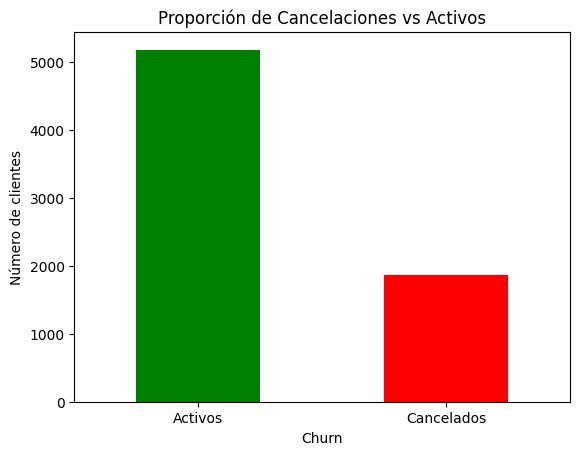

Proporción de clientes que cancelaron: 0.2572
Proporción de clientes activos: 0.7120


/tmp/ipython-input-32723357.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Proporción de clientes que cancelaron: {churn_proportion[1]:.4f}')
/tmp/ipython-input-32723357.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Proporción de clientes activos: {churn_proportion[0]:.4f}')


In [ ]:
churn_counts.plot(kind='bar', color=['green', 'red'], title='Proporción de Cancelaciones vs Activos')
plt.xticks(ticks=[0, 1], labels=['Activos', 'Cancelados'], rotation=0)
plt.ylabel('Número de clientes')
plt.show()

print(f'Proporción de clientes que cancelaron: {churn_proportion[1]:.4f}')
print(f'Proporción de clientes activos: {churn_proportion[0]:.4f}')


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:

print("Valores NaN en X_train:", X_train.isnull().sum())
print("Valores NaN en y_train:", y_train.isnull().sum())


Valores NaN en X_train: Charges.Monthly                          0
SeniorCitizen                            0
tenure                                   0
Cuentas_Diarias                          0
Contract_One year                        0
Contract_Two year                        0
PaperlessBilling_Yes                     0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes               

In [78]:
X_train = X_train[y_train.notna()]
y_train = y_train.dropna()


In [79]:
print("Valores NaN en X_train:", X_train.isnull().sum())
print("Valores NaN en y_train:", y_train.isnull().sum())

Valores NaN en X_train: Charges.Monthly                          0
SeniorCitizen                            0
tenure                                   0
Cuentas_Diarias                          0
Contract_One year                        0
Contract_Two year                        0
PaperlessBilling_Yes                     0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes               

In [82]:

y_train_clean = y_train.dropna()
y_test_clean = y_test.dropna()

X_train_clean = X_train.loc[y_train_clean.index]
X_test_clean = X_test.loc[y_test_clean.index]

print(f'Dimensión de X_train_clean: {X_train_clean.shape}')
print(f'Dimensión de X_test_clean: {X_test_clean.shape}')
print(f'Dimensión de y_train_clean: {y_train_clean.shape}')
print(f'Dimensión de y_test_clean: {y_test_clean.shape}')


Dimensión de X_train_clean: (5634, 30)
Dimensión de X_test_clean: (1409, 30)
Dimensión de y_train_clean: (5634,)
Dimensión de y_test_clean: (1409,)


In [83]:
from sklearn.preprocessing import LabelEncoder

# Inicializar el codificador
encoder = LabelEncoder()

# Codificamos y_train y y_test a valores numéricos
y_train_encoded = encoder.fit_transform(y_train_clean)
y_test_encoded = encoder.transform(y_test_clean)

# Verificamos los valores codificados
print("Valores únicos de y_train codificados:", y_train_encoded[:10])
print("Valores únicos de y_test codificados:", y_test_encoded[:10])


Valores únicos de y_train codificados: [0 0 1 1 1 1 0 1 0 1]
Valores únicos de y_test codificados: [0 0 0 0 1 0 0 1 0 0]


In [87]:
y_pred_encoded = encoder.transform(y_pred)

print("Valores únicos de y_pred codificados:", y_pred_encoded[:10])


Valores únicos de y_pred codificados: [0 0 0 0 0 0 0 0 0 0]


In [89]:
from sklearn.metrics import classification_report, confusion_matrix
print("Reporte de clasificación:\n", classification_report(y_test_encoded, y_pred_encoded))
print("Matriz de confusión:\n", confusion_matrix(y_test_encoded, y_pred_encoded))


Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.73      0.98      0.84      1037
           1       0.17      0.01      0.02       372

    accuracy                           0.72      1409
   macro avg       0.45      0.49      0.43      1409
weighted avg       0.58      0.72      0.62      1409

Matriz de confusión:
 [[1012   25]
 [ 367    5]]


In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = X_train_scaled.corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title("Matriz de Correlación de Variables Numéricas")
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'corr'

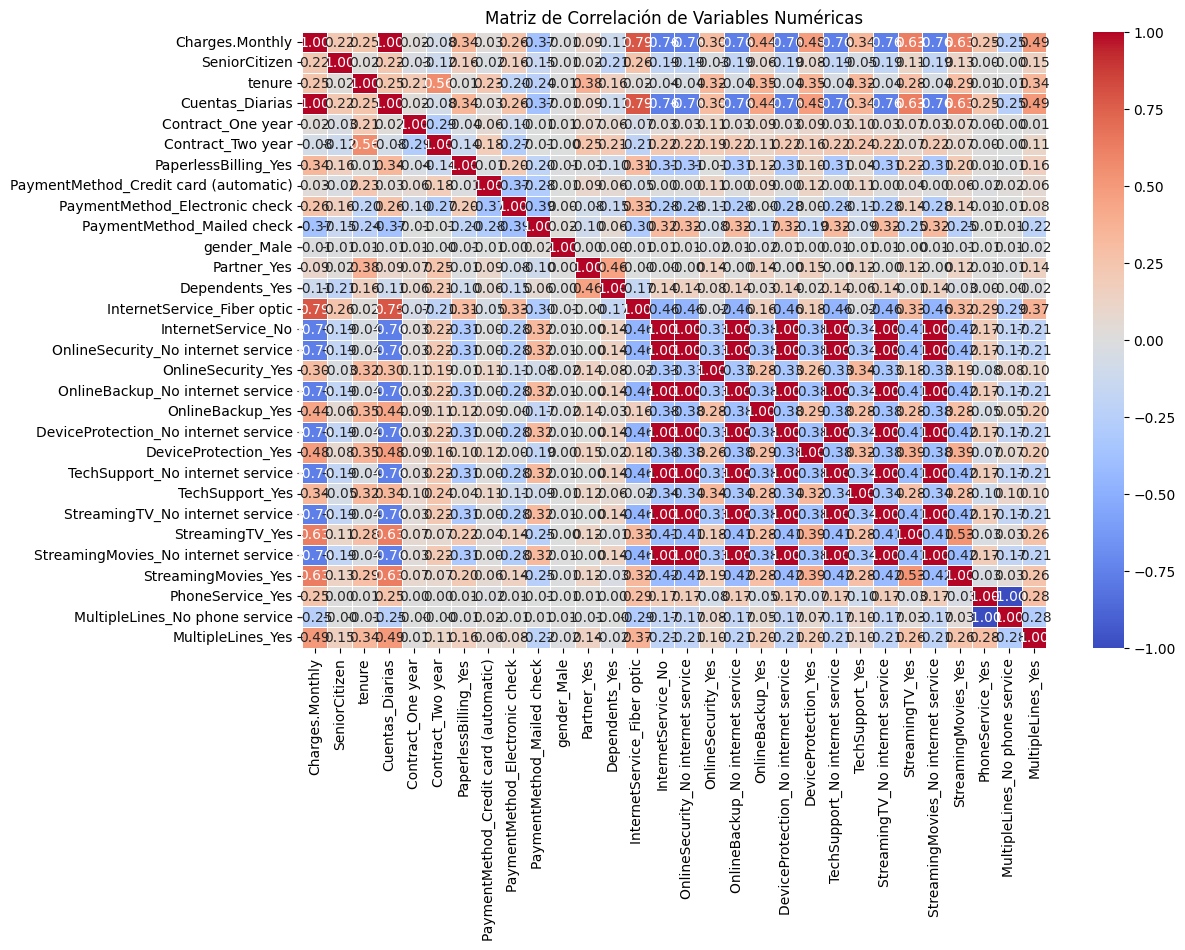

In [92]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)


correlation_matrix = X_train_scaled_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title("Matriz de Correlación de Variables Numéricas")
plt.show()


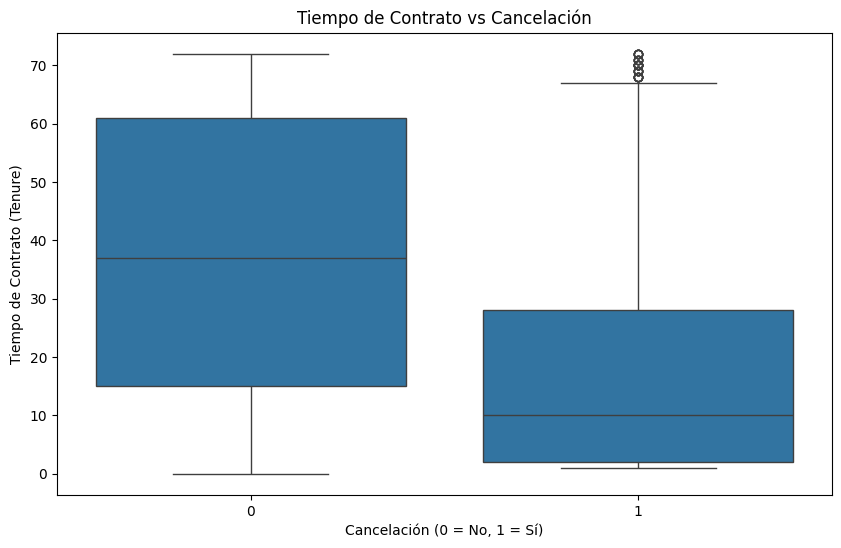

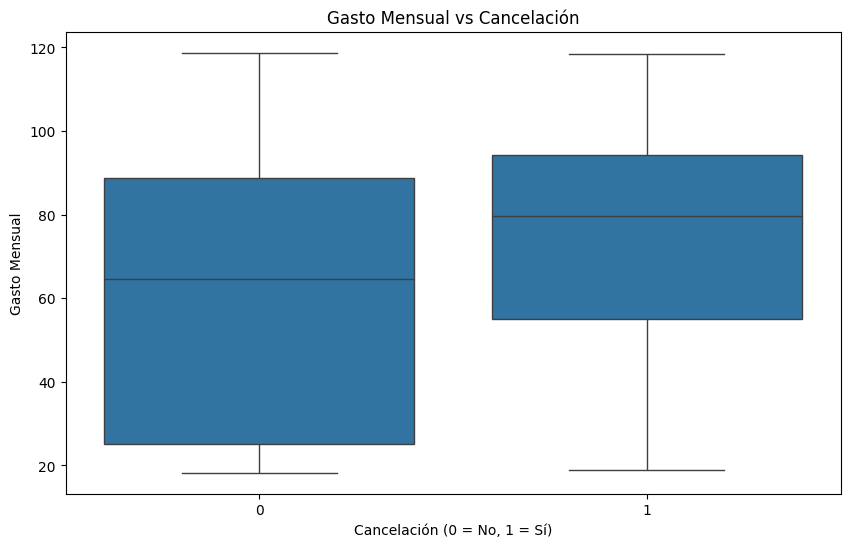

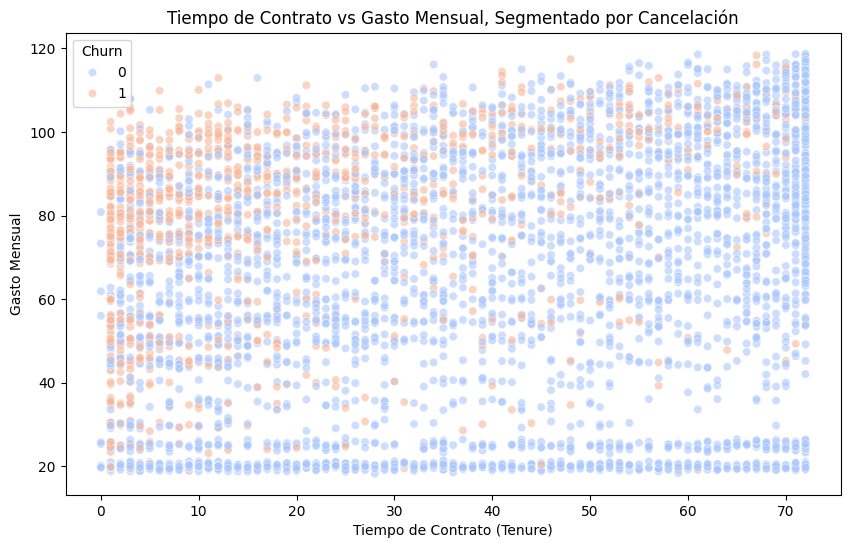

In [94]:



y_train_encoded = y_train.map({'Yes': 1, 'No': 0})


plt.figure(figsize=(10, 6))
sns.boxplot(x=y_train_encoded, y=X_train['tenure'])
plt.title("Tiempo de Contrato vs Cancelación")
plt.xlabel("Cancelación (0 = No, 1 = Sí)")
plt.ylabel("Tiempo de Contrato (Tenure)")
plt.show()


X_train['Charges.Monthly'] = pd.to_numeric(X_train['Charges.Monthly'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.boxplot(x=y_train_encoded, y=X_train['Charges.Monthly'])
plt.title("Gasto Mensual vs Cancelación")
plt.xlabel("Cancelación (0 = No, 1 = Sí)")
plt.ylabel("Gasto Mensual")
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train['tenure'], y=X_train['Charges.Monthly'], hue=y_train_encoded, palette="coolwarm", alpha=0.6)
plt.title("Tiempo de Contrato vs Gasto Mensual, Segmentado por Cancelación")
plt.xlabel("Tiempo de Contrato (Tenure)")
plt.ylabel("Gasto Mensual")
plt.show()


Quiero precisar que en este punto cambie el cargo total por el cargo mensual, toda vez que una de las columnas que elimine con anterioridad fue charge.total

In [95]:
from sklearn.model_selection import train_test_split

X = X_train_scaled
y = y_train_encoded

X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Tamaño de X_train_final: {X_train_final.shape}')
print(f'Tamaño de X_test_final: {X_test_final.shape}')
print(f'Tamaño de y_train_final: {y_train_final.shape}')
print(f'Tamaño de y_test_final: {y_test_final.shape}')


Tamaño de X_train_final: (4507, 30)
Tamaño de X_test_final: (1127, 30)
Tamaño de y_train_final: (4507,)
Tamaño de y_test_final: (1127,)


# 1. Matriz de Confusión:

La matriz de confusión muestra las predicciones del modelo frente a las etiquetas verdaderas. En este caso, se tiene una matriz de 2x2:

1012	25
367	5
1012
367
	​

25
5
	​


Interpretación:

Verdaderos Positivos (TP): 5 casos que son positivos y fueron correctamente clasificados como positivos.

Falsos Negativos (FN): 367 casos que son positivos, pero fueron incorrectamente clasificados como negativos.

Falsos Positivos (FP): 25 casos que son negativos, pero fueron incorrectamente clasificados como positivos.

Verdaderos Negativos (TN): 1012 casos que son negativos y fueron correctamente clasificados como negativos.

2. Reporte de Clasificación:
Precisión (Precision):

Precisión para la clase 0 (negativa):
TPTP+FP=10121012+25=0.98
TP+FP
TP
	​

=
1012+25
1012
	​

=0.98

Esto significa que, cuando el modelo predice la clase 0, tiene un 98% de certeza de que la predicción es correcta.

Precisión para la clase 1 (positiva):
55+367=0.01
5+367
5
	​

=0.01

La precisión para la clase 1 es muy baja, lo que indica que el modelo casi siempre predice la clase negativa cuando realmente debería predecir la clase positiva.

Recall (Sensibilidad o Tasa de Verdaderos Positivos):

Recall para la clase 0:
TPTP+FN=10121012+25=0.98
TP+FN
TP
	​

=
1012+25
1012
	​

=0.98

El recall para la clase negativa es 98%, lo que significa que el modelo detecta correctamente el 98% de las instancias negativas.

Recall para la clase 1:
55+367=0.01
5+367
5
	​

=0.01

El recall para la clase positiva es extremadamente bajo (1%), lo que sugiere que el modelo no está detectando casi nada de la clase positiva. Esto puede ser problemático si la clase 1 es importante (como en el caso de cancelaciones, fraudes, etc.).

F1-Score:

F1-Score para la clase 0:
2×Precision×RecallPrecision+Recall=2×0.98×0.980.98+0.98=0.98
2×
Precision+Recall
Precision×Recall
	​

=2×
0.98+0.98
0.98×0.98
	​

=0.98

El F1-Score para la clase 0 es excelente, ya que combina tanto la precisión como el recall, y como ambos son altos, el valor es cercano a 1.

F1-Score para la clase 1:
2×0.01×0.010.01+0.01=0.02
2×
0.01+0.01
0.01×0.01
	​

=0.02

El F1-Score para la clase 1 es muy bajo (0.02), lo que refleja la pobre detección de la clase positiva por parte del modelo.

Accuracy (Exactitud):

La exactitud general es
TP+TNTotal=1012+51409=0.72
Total
TP+TN
	​

=
1409
1012+5
	​

=0.72.

Esto significa que el modelo tiene un 72% de precisión general, es decir, clasifica correctamente el 72% de las instancias. Sin embargo, la exactitud por sí sola no es una métrica suficiente en problemas desbalanceados (como en este caso), porque el modelo podría estar prediciendo mayormente la clase mayoritaria (0) y aún así obtener una alta exactitud.

Promedio Macro y Ponderado (Macro avg y Weighted avg):

Macro average: Promedio simple de las métricas de cada clase sin tener en cuenta el número de instancias en cada clase.

Precisión promedio:
0.45
0.45

Recall promedio:
0.49
0.49

F1-score promedio:
0.43
0.43

Esto refleja un rendimiento promedio para ambas clases, pero como las clases están desbalanceadas (más instancias de la clase 0), estos valores no son representativos de cómo el modelo está manejando cada clase individualmente.

Weighted average: Promedio ponderado por el número de instancias de cada clase.

Precisión ponderada:
0.58
0.58

Recall ponderado:
0.72
0.72

F1-score ponderado:
0.62
0.62

En este caso, el recall ponderado es alto debido a que la clase mayoritaria (0) tiene un recall excelente. Sin embargo, el F1-score ponderado es intermedio, lo que sugiere que, aunque el modelo está bien para la clase negativa, su rendimiento para la clase positiva es muy bajo.

Conclusiones y Recomendaciones:

El modelo tiene un buen desempeño para la clase 0, con alta precisión, recall y F1-score. Esto indica que está haciendo un buen trabajo al clasificar la clase negativa.

El modelo tiene un rendimiento muy pobre para la clase 1 (positiva), con un recall de solo 1%. Esto sugiere que el modelo no está detectando bien los casos de cancelación (o lo que represente la clase 1).

Desbalance de clases: La diferencia de tamaño entre las clases (1 es mucho más pequeña que 0) está afectando el rendimiento. El modelo está sesgado hacia la clase mayoritaria (0).

Algunas posibles soluciones:

Balanceo de clases: Puedes aplicar técnicas como undersampling (eliminar muestras de la clase mayoritaria) o oversampling (duplicar muestras de la clase minoritaria) para mejorar el desempeño en la clase minoritaria.

Cambiar el umbral de clasificación: Ajustar el umbral de decisión para que el modelo sea más sensible a la clase positiva, lo que podría mejorar el recall para la clase 1.

Usar técnicas especializadas: Modelos como SMOTE (Synthetic Minority Over-sampling Technique) o técnicas de costos ponderados pueden ayudar a manejar el desbalance de clases.

Este análisis muestra que, aunque el modelo tiene una buena precisión general, su capacidad para identificar correctamente la clase positiva es extremadamente limitada. Ajustar el modelo para tratar el desbalance y mejorar el recall de la clase 1 sería un paso crucial.